In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
audi = pd.read_csv("datasets/audi_challenge.csv")
audi

,index,car description,price (euro),age (year),fuel type,transmission,bodystyle,car model,mileage (km)
0,0,"Audi A3 1.8 TFSI 160pk S tronic S-Line (Xenon,...",13650.0,9,Petrol,Automatic,Cabriolet,A3,115174
1,1,Audi A7 Sportback 55 TFSI 340pk Quattro Pro Li...,91800.0,1,Petrol,Automatic,Hatchback,A7,8527
2,2,Audi A3 1.6 TDI 110 PK S-Line | Xenon | Bang &...,26150.0,3,Diesel,Manual,Sedan,A3,82345
3,3,Audi A8 Lang 3.0 TDI 258pk Tiptronic Quattro P...,50900.0,4,Diesel,Automatic,Sedan,A8,144772
4,4,Audi TT 1.8 TFSI Coupe Pro Line -MMI+/Xenon/St...,37700.0,2,Petrol,Manual,Coupe,TT,16652
...,...,...,...,...,...,...,...,...,...
7917,7917,Audi A1 1.0 TFSI 70KW SPORTBACK S-TR,NaN,4,Petrol,Automatic,Hatchback,A1,62170
7918,7918,Audi S4 Audi S4 4.2 V8 quattro Advance AUTM. S...,NaN,14,Petrol,Automatic,Station wagon,S4,156805
7919,7919,"Audi A5 Sportback | Nu inclusief € 2.000,- Voo...",NaN,1,Petrol,Automatic,Hatchback,A5,0
7920,7920,Audi A3 1.9 TDI Attraction Pro Line Business,NaN,12,Diesel,Manual,Hatchback,A3,285491


In [3]:
#drop the collumn "index"
audi = audi.drop(columns=["index"])

#drop the collumn "car description"
audi = audi.drop(columns=["car description"])


In [4]:
audi["bodystyle"].value_counts()

bodystyle
Hatchback        2923
Station wagon    1655
Sedan            1390
SUV              1292
Cabriolet         404
Coupe             258
Name: count, dtype: int64

change collumns with words

In [5]:
# change the collumn "fuel type" to a true false collumn and change name to "fuel type_is_diesel"
audi["fuel_type_is_diesel"] = audi["fuel type"].apply(lambda x: True if x == "Diesel" else False)
audi = audi.drop(columns=["fuel type"])

# change the collumn "transmission" to a true false collumn and change name to "transmission_is_manual"
audi["transmission_is_manual"] = audi["transmission"].apply(lambda x: True if x == "Manual" else False)
audi = audi.drop(columns=["transmission"])


# change the collumn "bodystyle" to 6 collumns with one hot encoding
audi = pd.get_dummies(audi, columns=["bodystyle"], drop_first=True)

# change the collumn "model"
audi = pd.get_dummies(audi, columns=["car model"], drop_first=True)


In [6]:
audi

,price (euro),age (year),mileage (km),fuel_type_is_diesel,transmission_is_manual,bodystyle_Coupe,bodystyle_Hatchback,bodystyle_SUV,bodystyle_Sedan,bodystyle_Station wagon,...,car model_S1,car model_S3,car model_S4,car model_S5,car model_S6,car model_S7,car model_S8,car model_SQ5,car model_SQ7,car model_TT
0,13650.0,9,115174,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,91800.0,1,8527,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,26150.0,3,82345,True,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,50900.0,4,144772,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,37700.0,2,16652,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7917,NaN,4,62170,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7918,NaN,14,156805,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
7919,NaN,1,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7920,NaN,12,285491,True,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# split the data into training, testing and validation sets

In [7]:
# split the data into the ones that have a price and the ones that don't
audi_with_price = audi[audi['price (euro)'].notnull()]
audi_without_price = audi[audi['price (euro)'].isnull()]

# Correlation matrix

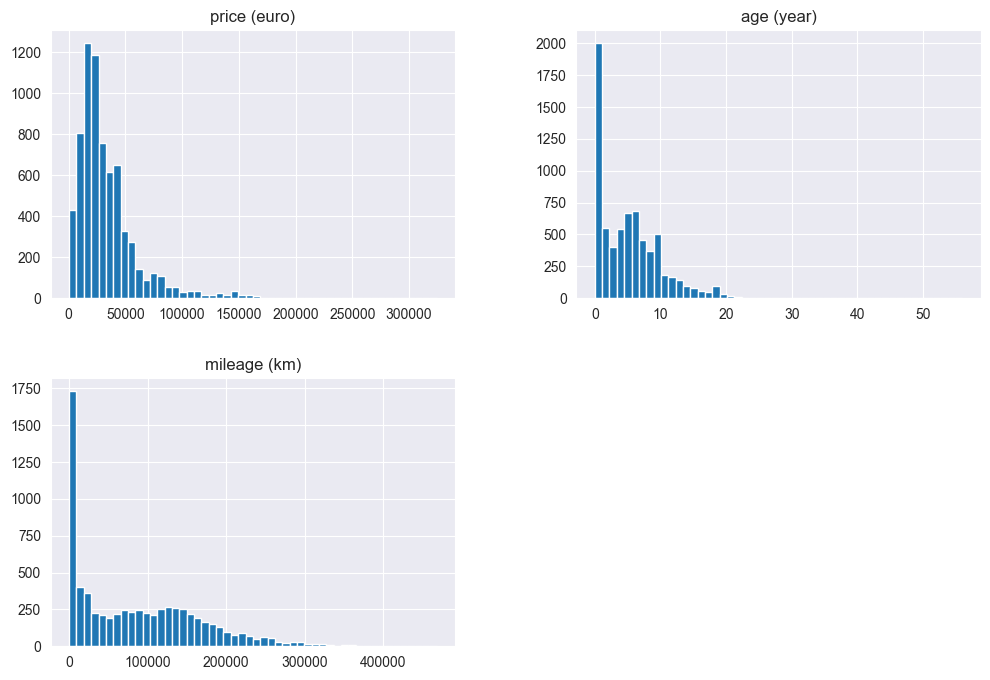

In [8]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=12)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

audi_with_price.hist(bins=50, figsize=(12, 8))
plt.show()

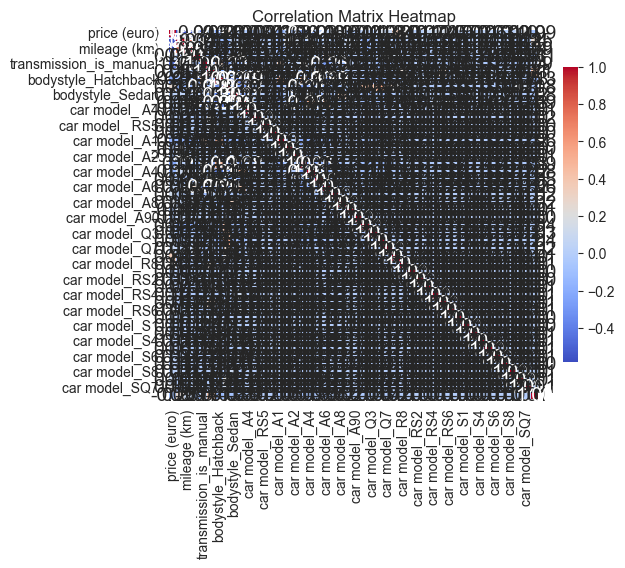

In [9]:
corr_matrix = audi_with_price.corr(numeric_only=True)
corr_matrix["price (euro)"].sort_values(ascending=False)

# Plot the heatmap
# plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix Heatmap")
plt.show()


# Split data

Split the data into training, testing and validation sets

C:\Users\daank\AppData\Local\Temp\ipykernel_20276\2542839105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  audi_with_price["age category"] = pd.cut(audi_with_price["age (year)"],


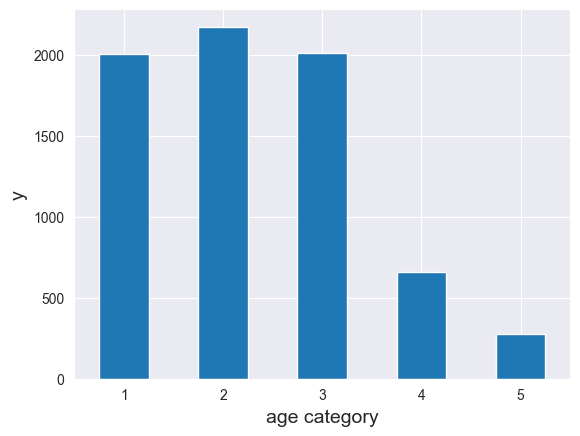

In [10]:
audi_with_price["age category"] = pd.cut(audi_with_price["age (year)"],
                               bins=[-np.inf, 1, 5, 10, 15, np.inf],
                               labels=[1, 2, 3, 4, 5])

# plot the distribution of the age category
audi_with_price["age category"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("age category")
plt.ylabel("y")
#save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()

In [11]:
audi_with_price

,price (euro),age (year),mileage (km),fuel_type_is_diesel,transmission_is_manual,bodystyle_Coupe,bodystyle_Hatchback,bodystyle_SUV,bodystyle_Sedan,bodystyle_Station wagon,...,car model_S3,car model_S4,car model_S5,car model_S6,car model_S7,car model_S8,car model_SQ5,car model_SQ7,car model_TT,age category
0,13650.0,9,115174,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3
1,91800.0,1,8527,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,26150.0,3,82345,True,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2
3,50900.0,4,144772,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2
4,37700.0,2,16652,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7117,42050.0,0,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,1
7118,48800.0,1,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1
7119,17300.0,5,108716,True,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2
7120,27250.0,6,125975,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,3


In [12]:
# split the data into training, testing and validation sets
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    audi_with_price, test_size=0.2, stratify=audi_with_price["age category"], random_state=42)

In [13]:
train_set

,price (euro),age (year),mileage (km),fuel_type_is_diesel,transmission_is_manual,bodystyle_Coupe,bodystyle_Hatchback,bodystyle_SUV,bodystyle_Sedan,bodystyle_Station wagon,...,car model_S3,car model_S4,car model_S5,car model_S6,car model_S7,car model_S8,car model_SQ5,car model_SQ7,car model_TT,age category
1099,46100.0,1,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1137,20400.0,2,13124,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,2
2762,31400.0,7,135000,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,3
6202,43900.0,1,0,True,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,1
4458,10450.0,16,86714,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,168650.0,1,3000,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,1
670,2550.0,16,248181,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,5
1346,27300.0,3,86949,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,2
5419,153300.0,1,0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1


Scale# Scale the data

In [14]:
# split the data into features and target variable
X_train = train_set.drop(columns=["price (euro)", "age category"])
y_train = train_set["price (euro)"].copy()

X_test = test_set.drop(columns=["price (euro)", "age category"])
y_test = test_set["price (euro)"].copy()

In [15]:
X_train

,age (year),mileage (km),fuel_type_is_diesel,transmission_is_manual,bodystyle_Coupe,bodystyle_Hatchback,bodystyle_SUV,bodystyle_Sedan,bodystyle_Station wagon,car model_ A4,...,car model_S1,car model_S3,car model_S4,car model_S5,car model_S6,car model_S7,car model_S8,car model_SQ5,car model_SQ7,car model_TT
1099,1,0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1137,2,13124,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2762,7,135000,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6202,1,0,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4458,16,86714,True,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,1,3000,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
670,16,248181,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1346,3,86949,True,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5419,1,0,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [17]:
X_test_scaled = scaler.transform(X_test)

# Model

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error


# Step 2: Initialize the Ridge regression model
ridge_model = Ridge()

# Step 3: Define the hyperparameter grid for alpha (regularization parameter, controls strength of penalty)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]} # 0 = no penalty, ordinairy linear regression

# Step 4: Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Step 5: Train (fit) the Ridge model with GridSearchCV
grid_search.fit(X_train, y_train)



C:\Users\daank\PycharmProjects\data-science-homework-2025\.venv\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.31341e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
C:\Users\daank\PycharmProjects\data-science-homework-2025\.venv\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.32055e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
C:\Users\daank\PycharmProjects\data-science-homework-2025\.venv\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.30402e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
C:\Users\daank\PycharmProjects\data-science-homework-2025\.venv\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.32592e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
C:\Users\daank\PycharmProjects\data-science-home

,estimator,Ridge()
,param_grid,"{'alpha': [0.001, 0.01, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.1


In [19]:
# Step 6: Get the best model and parameters
best_ridge_model = grid_search.best_estimator_
# print("Best alpha for Ridge:", grid_search.best_params_['alpha’])



In [20]:
# Step 7: Make predictions on the test set with the best model
y_pred_test = best_ridge_model.predict(X_test)

# Step 8: Evaluate the model using RMSE
rmse = root_mean_squared_error(y_test, y_pred_test)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 12675.24655021014
